In [1]:
!pip install bnlp_toolkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 36.8 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171033 sha256=4323a16e1f00e4d71200450ef0b66edee85eed8fbd84de694d3b7b136ece23e2
  Stored in directory: /root/.cache/pip/wheels/31/8a/8c/315c9e5d7773f74b33d5ed33f075b49c6eaeb7cedbb86e2cf8
Successfully built emoji
  Attempting uninstall: emoji
    Found existing installation: emoji 2.10.0
    Uninstalling emoji-2.10.0:
      Successfully uninstalled emoji-2.10.0


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from bnlp import NLTKTokenizer

In [3]:
df_train = pd.read_excel("/kaggle/input/cleantext/BEmoC7k.xlsx")

In [4]:
df_train.head()

,TEXT,classes
0,নাইমা কি করবেন আমরা জানি,sadness
1,ভাই সব আপনাদের খুব ভাল লাগছে,joy
2,গাঞ্জা খাইয়া নিউজ শেয়ার করছে দিগন্ত বয়কটে ...,anger
3,অনেক ধন্যবাদ স্যার যশোরে ইত্যাদি অনুষ্ঠান করার...,joy
4,বর্তমানে মুসলমান মারে যে জন সে জন হয়েছে ঈশ্বর,disgust


In [5]:
df_train.dropna(inplace=True)

In [6]:
longest_string = max(df_train["TEXT"], key=len)
print(len(longest_string))

1093


In [7]:
df_train['classes'].value_counts()

classes
joy         1524
disgust     1356
sadness     1327
anger       1052
fear         962
surprise     779
Name: count, dtype: int64

In [8]:
from bnlp import CleanText

clean_text = CleanText(
   fix_unicode=True,
   unicode_norm=True,
   unicode_norm_form="NFKC",
   remove_url=True,
   remove_email=True,
   remove_emoji=False,
   remove_number=False,
   remove_digits=False,
   remove_punct=False,
   replace_with_url="<URL>",
   replace_with_email="<EMAIL>",
   replace_with_number="<NUMBER>",
   replace_with_digit="<DIGIT>",
   replace_with_punct = "<PUNC>"
)

In [9]:
df_train['TEXT'] = df_train['TEXT'].apply(clean_text)

In [10]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df_train, test_size=0.2,stratify=df_train['classes'],random_state=42)

In [11]:
X_train  =  train_df['TEXT'].values.tolist()
y_train = train_df['classes'].tolist()

In [12]:
X_test =  test_df['TEXT'].values.tolist()
y_test = test_df['classes'].tolist()

In [13]:
!pip install ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 59.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 43.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 25.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.4/199.4 kB 11.7 MB/s eta 0:00:00
  Created wheel for ktrain: filename=ktrain-0.40.0-py3-none-any.whl size=25319454 sha256=25f76c598c351bfdf5ea3ee5fa53150a7d62dbd0511c0081799e09a0acb6ac10
  Stored in directory: /roo

In [14]:
import ktrain
from ktrain import text
MODEL_NAME = 'csebuetnlp/banglabert'
t = text.Transformer(MODEL_NAME, maxlen=500)

config.json:   0%|          | 0.00/586 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/443M [00:00<?, ?B/s]

In [15]:
trn = t.preprocess_train(X_train, y_train)
val = t.preprocess_test(X_test, y_test)

preprocessing train...
language: bn
train sequence lengths:
	mean : 21
	95percentile : 41
	99percentile : 57


tokenizer_config.json:   0%|          | 0.00/119 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/528k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: bn
test sequence lengths:
	mean : 21
	95percentile : 41
	99percentile : 61


In [16]:
print(trn)

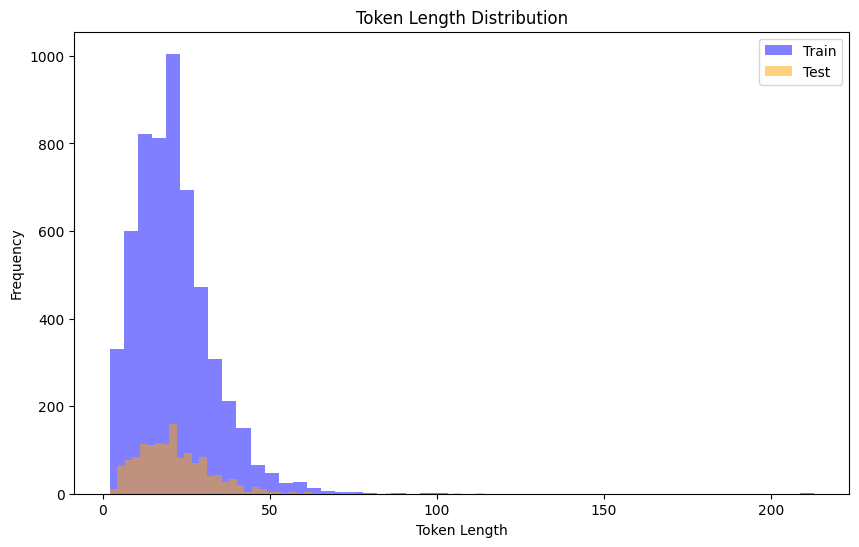

In [17]:
import matplotlib.pyplot as plt

# Calculate token lengths for train and test datasets
train_token_lengths = [len(t.split()) for t in X_train]
test_token_lengths = [len(t.split()) for t in X_test]

# Plot token length distribution
plt.figure(figsize=(10, 6))
plt.hist(train_token_lengths, bins=50, alpha=0.5, color='blue', label='Train')
plt.hist(test_token_lengths, bins=50, alpha=0.5, color='orange', label='Test')
plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.title('Token Length Distribution')
plt.legend()
plt.show()

In [18]:
model = t.get_classifier()

In [19]:
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=8)

In [20]:
# Adding early stopping callback from TensorFlow
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='accuracy', patience=5, mode='auto')

In [21]:
history = learner.fit_onecycle(2e-5, 10,callbacks=[early_stopping])



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/10
700/700 [==============================] - 427s 576ms/step - loss: 1.6220 - accuracy: 0.3579 - val_loss: 1.2154 - val_accuracy: 0.5714
Epoch 2/10
700/700 [==============================] - 399s 570ms/step - loss: 1.0140 - accuracy: 0.6438 - val_loss: 0.8125 - val_accuracy: 0.7036
Epoch 3/10
700/700 [==============================] - 399s 570ms/step - loss: 0.7304 - accuracy: 0.7336 - val_loss: 0.8063 - val_accuracy: 0.7129
Epoch 4/10
700/700 [==============================] - 399s 570ms/step - loss: 0.5619 - accuracy: 0.7959 - val_loss: 0.7923 - val_accuracy: 0.7250
Epoch 5/10
700/700 [==============================] - 399s 570ms/step - loss: 0.4215 - accuracy: 0.8566 - val_loss: 0.8476 - val_accuracy: 0.7286
Epoch 6/10
700/700 [==============================] - 399s 570ms/step - loss: 0.3012 - accuracy: 0.9011 - val_loss: 1.0259 - val_accuracy: 0.7129
Epoch 7/10
700/700 [==============================] - 399s 57

In [22]:
# Save the trained model
learner.save_model('/kaggle/output/bemoc.zip')

In [23]:
classes=t.get_classes()

In [24]:
cm = learner.validate(class_names=t.get_classes())

44/44 [==============================] - 11s 175ms/step
              precision    recall  f1-score   support

       anger       0.67      0.58      0.62       211
     disgust       0.58      0.63      0.60       271
        fear       0.81      0.80      0.80       192
         joy       0.86      0.88      0.87       305
     sadness       0.73      0.79      0.76       265
    surprise       0.77      0.65      0.70       156

    accuracy                           0.73      1400
   macro avg       0.73      0.72      0.73      1400
weighted avg       0.73      0.73      0.73      1400

